Feito por: @heitorpupim 
<a href = "https://github.com/HeitorPupim/"> github.com/HeitorPupim</a>

<h1> Parte 1 - EDA -> Exploratory Data Analysis </h1>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [98]:
data = pd.read_csv('/home/heitor/workspace/PythonDataScience/data/train.csv')

In [99]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
#precisamos checar valores nulos, então vamos fazer uma soma dos valores em cada coluna:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Os dados de **Age, Cabin e Embarked** tem valores nulos, vamos tentar arrumar isso futuramente.

Agora tentaremos encontrar **quantos sobreviveram**

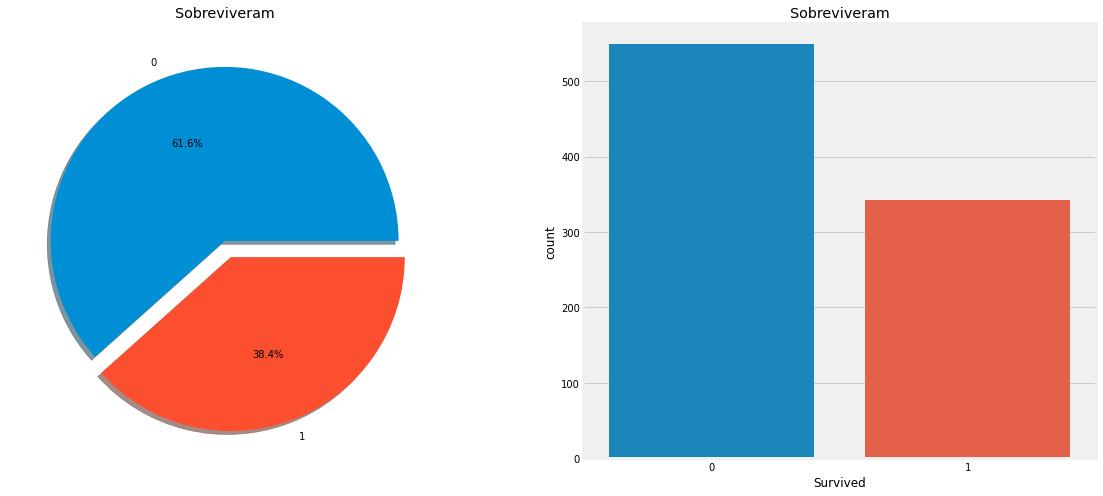

In [101]:
f, ax = plt.subplots(1 ,2 ,figsize = (18,8)) # uma linha e duas colunas de gráficos e o tamanho da figura..
data['Survived'].value_counts().plot.pie(
                                        explode = [0,0.1], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        ax = ax[0], #indica onde será plotado a figura, na coluna 1.
                                        shadow = True
                                        )
ax[0].set_title("Sobreviveram")
ax[0].set_ylabel('')

sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title("Sobreviveram")
plt.show()

<h1> Tipos de Características</h1>

In [102]:
# Sexo ->  Caracteristica categórica
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sexo: Sobreviventes vs Mortos')

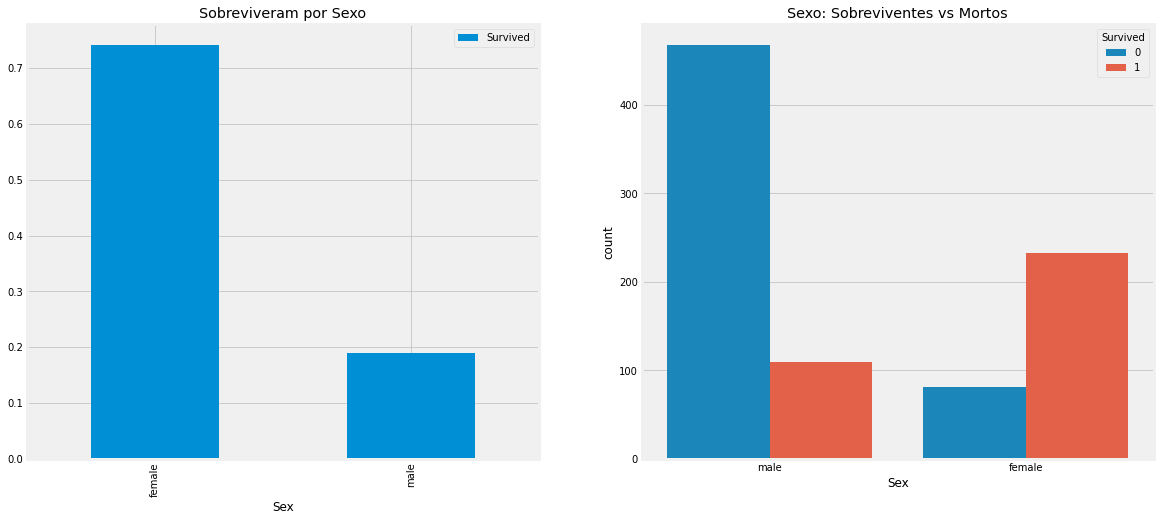

In [103]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0]) #gráfico da média de sobreviventes.
ax[0].set_title('Sobreviveram por Sexo')

sns.countplot('Sex',
              hue = 'Survived', # hue = nunace, que quer dizer para diferenciar os tons, no caso vamos fazer um count de Sexo, entao vamos diferenciar as cores por Sobreviveu ou Não Sobreviveu
              data = data,
              ax = ax[1])
ax[1].set_title('Sexo: Sobreviventes vs Mortos')

O número de homens no navio é muito maior do que o número de mulheres. Mesmo assim, o número de mulheres salvas é quase duas vezes o número de homens salvos. **A taxa de sobrevivência para mulheres no navio é quase 75%, enquanto a taxa de sobreviventes do sexo masculino é cerca de 18-19%**

<h5> Pclass -> Característica Ordinal</h5>


In [104]:
#tabela cruzada
pd.crosstab(data.Pclass, #na linha vamos colocar as classes dos passageiros
            data.Survived, # na coluna, vamos colocar a sobrevivência.
            margins = True).style.background_gradient(cmap = 'summer_r')
#As cores mais fortes querem dizer que o número é mais expressivo para aquela característica.
#Podemos ver que passageiros na classe 3 tiveram maior índice de mortes. 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Tipo de Classe')

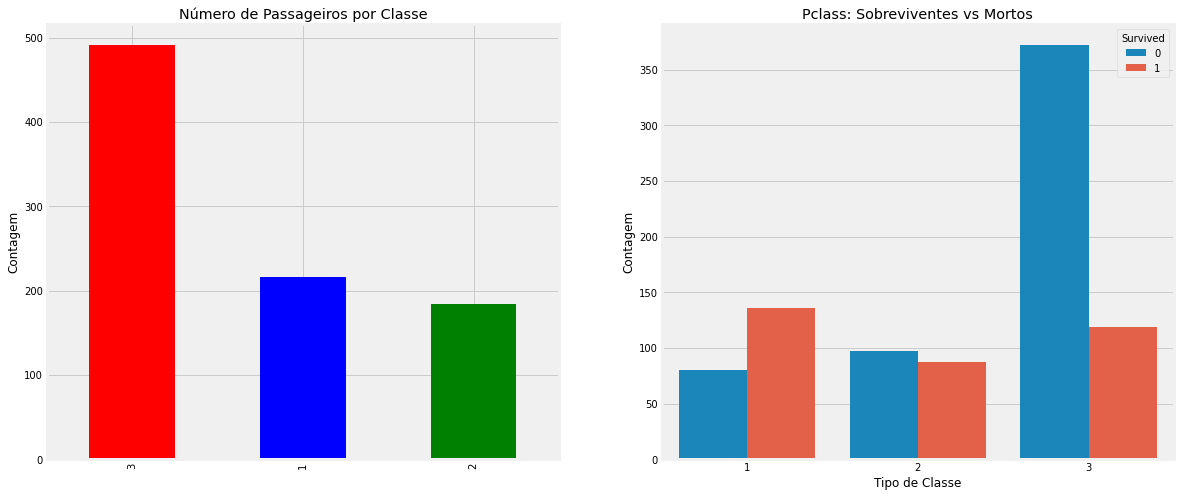

In [105]:
f, ax = plt.subplots(1,2 , figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color = ['r','b','g'], ax = ax[0])
ax[0].set_title('Número de Passageiros por Classe')
ax[0].set_ylabel('Contagem')

sns.countplot('Pclass', hue = 'Survived', data= data, ax = ax[1])
ax[1].set_title('Pclass: Sobreviventes vs Mortos')
ax[1].set_ylabel('Contagem')
ax[1].set_xlabel("Tipo de Classe")

Os passageiros de classe 1 e 2 tiveram índices de sobrevivência muito maiores do que as outras classes mais pobres, apesar de terem menos pessoas.

**Classe vs Taxa de Sobrevivência**

*Classe1 -> 63%*

*Classe2 -> 48%*

*Classe3 -> 25%*

In [106]:
pd.crosstab([data.Sex,
             data.Survived],
            data.Pclass, 
            margins = True).style.background_gradient(cmap = 'summer_r')

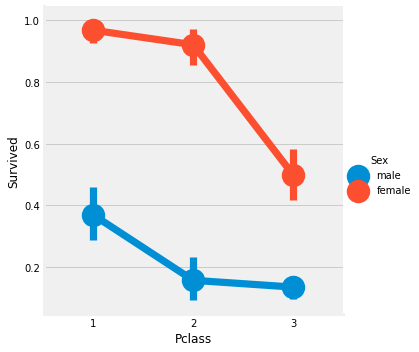

In [107]:
sns.factorplot('Pclass', 'Survived', hue = "Sex", data=data)
plt.show()

Neste caso, podemos usar o FactorPlot, pois ele é capaz de fazer a separação categórica de forma mais visual.

Olhando para a CrossTab e o Factorplot, podemos inferir que a sobrevivência de Mulheres da Classe 1 é perto de 95 a 96%, pois apenas 3 mulheres da classe 1 morreram.

É evidente que as mulheres de classe 1 foram priorizadas na hora do resgate. Até mesmo os homens da classe 1 tem menor taxa de sobrevivência.

<h5>    Idade (Age) -> Característica Contínua </h5>

In [108]:
print(("O passageiro mais velho do navio tinha {} anos").format(data['Age'].max()))
print(("O passageiro mais novo do navio tinha {} anos").format(data['Age'].min()))
print(("A média de idade dos passageiros do navio era de {} anos").format(data['Age'].mean()))


O passageiro mais velho do navio tinha 80.0 anos
O passageiro mais novo do navio tinha 0.42 anos
A média de idade dos passageiros do navio era de 29.69911764705882 anos


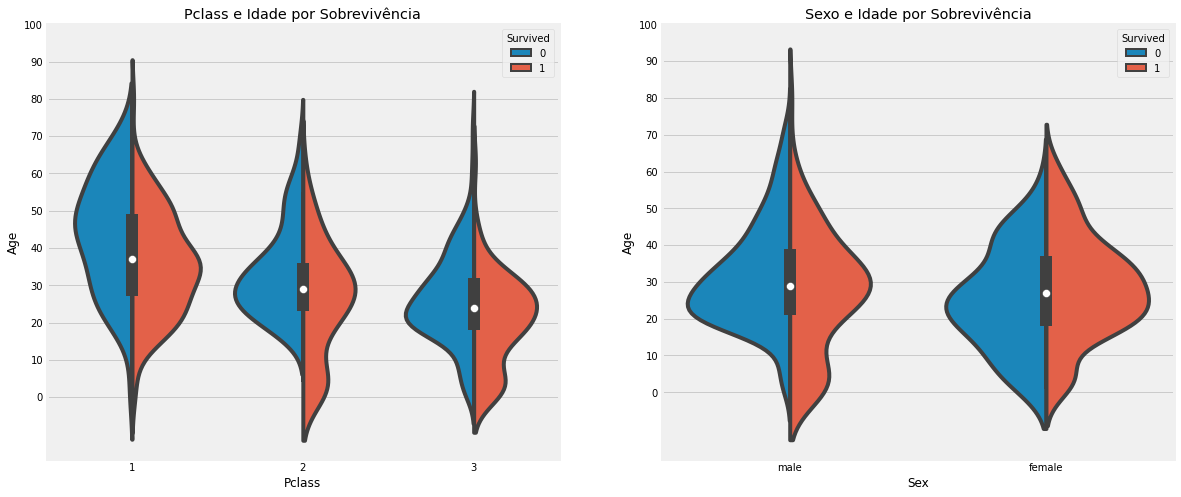

In [109]:
f, ax = plt.subplots(1,2, figsize = (18,8))

#Violinplot é um gráfico em que podemos analisar mais de uma variável, portanto, o desenho é uma figura.

sns.violinplot("Pclass", # eixo X
               "Age", # eixo Y
               hue = "Survived", #diferenciação de sobrevivência 
               data=  data, #declarando o dataframe
               split = True, #divide fazendo "metade azul e metade vermelho"
               ax = ax[0]) # declara qual é a figura que vamos plotar
ax[0].set_title("Pclass e Idade por Sobrevivência")
ax[0].set_yticks(range(0,110,10)) # serve para colocar linhas no eixo y, de 0 a 110, de 10 em 10.

sns.violinplot("Sex", #eixo x
               "Age", # eixo y
               hue = "Survived", # a diferenciação 
               data = data, # dataframe
               split = True, # dividir
               ax = ax[1]) # declara a coluna onde será plotado.

ax[1].set_title("Sexo e Idade por Sobrevivência")
ax[1].set_yticks(range(0,110,10))

plt.show()

**Observações:**

1) O número de crianças cresce com a Classe e a taxa de sobrevivência de passageiros com idade menor que 10 parace ser boa independente da classe.

2) As chances de sobrevivência  para passageiros com idade de 20-50 anos na classe 1 é maior e é ainda melhor para mulheres

3) Para homens, as chances de sobrevivência cai conforme cresce a idade.


Como visto anteriormente, a "Idade" tem 177 valores nulos no dataset. Para repor esses valores tidos como Nan, podemos substituí-los pela média da idade dos passageiros.

Porém, existe um problema: não podemos dar a idade de 29 anos para um passageiro de 4 anos deidade. Temos que descobrir qual é a faixa etária do passageiro.

Podemos analisar os nomes, pois alguns possuem Sr. e Sra. Depois, podemos tirar a média dos valores de Sr. e Sra. para os respectivos grupos.


In [110]:
data['Initial'] = 0 

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # vamos tirar apeanas as que possuem Sr. e Sra.

Utilizando '([A-Za-z]+)\.' como Regex, vamos extrair apenas as strings que ficam entre A-Z ou a-z e seguidos por um . (ponto), então, podemos extrair as iniciais do nome.

In [111]:
pd.crosstab(data.Initial,
            data.Sex).T.style.background_gradient(cmap = "summer_r") # checando as iniciais com o Sexo

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle e Mme significam Miss, então podemos subistituí-las por Miss e colocar a mesma coisa para os demais valores.



In [112]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'] #primeira coisa que vamos substituir
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], # outras coisas que entrarão no lugar.
                        inplace=True) # colocar no mesmo lugar.

In [113]:
data.groupby("Initial")['Age'].mean() #checando as médias de idade por inicial

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Agora, podemos substituir os valores NaN de idades para os valores das idades médias de cada grupo.

In [114]:
data.loc[(data.Age.isnull())&(data.Initial == "Mr"), 'Age'] = 33 #Localiza o valor com as condições pedidas, depois substitui a idade por 33.
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [115]:

#Verificando a existência de valores nulos, daí podemos utilizar any() para retornar se existe "Algum" valor.
data.Age.isnull().any() 


False

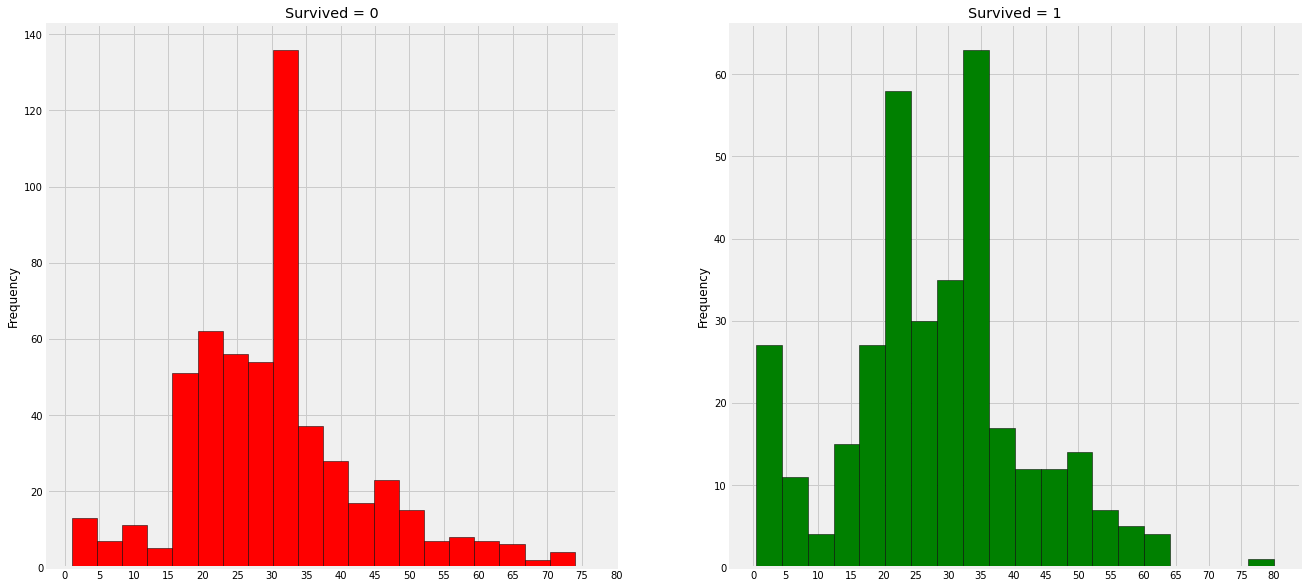

In [116]:
f, ax = plt.subplots(1,2, figsize = (20,10))

#grafico 1
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0],
                                          bins = 20,
                                          edgecolor = 'black',
                                          color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

#grafico 2
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1],
                                          color = 'green', 
                                          bins = 20, 
                                          edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()



**Observações:**

1) As crianças de 0 a 5 anos foram salvos em larga escala
2) O passageiro mais velho ( de 80 anos) foi salvo
3) O número máximo de mortes estava no grupo de 30 a 40 anos

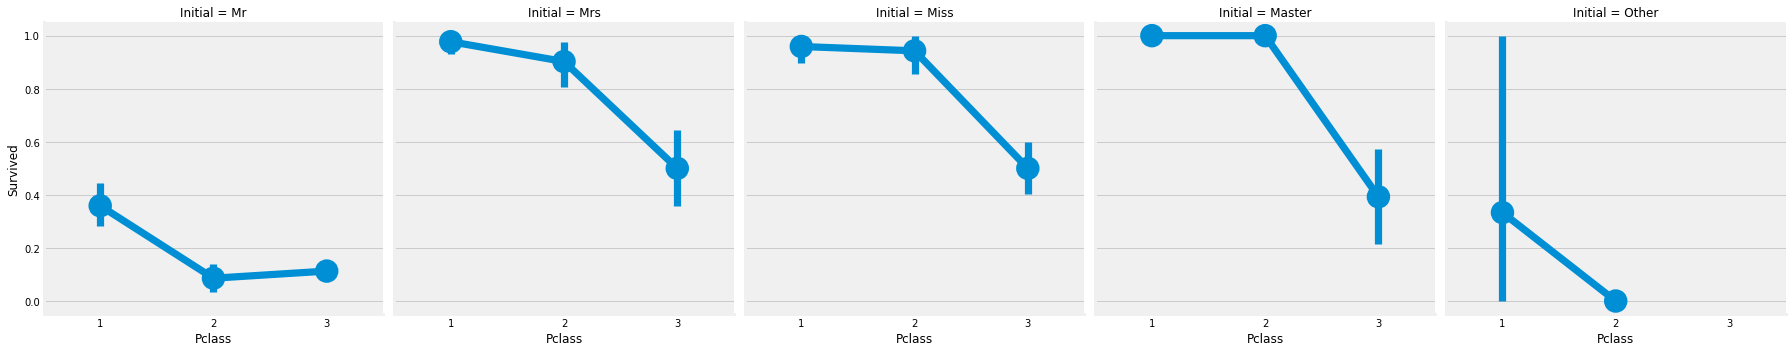

In [117]:
sns.factorplot('Pclass',
               'Survived',
               col = 'Initial',
               data = data)
plt.show()

A lei de Mulheres e Crianças foi efetivada apesar das classes.

<h5> Embarked -> Valor Categórico </h5>

**Obs:** Embarked significa qual foi o porto de Embarcação do passageiro no Titanic

In [118]:
pd.crosstab([data.Embarked,#linha
            data.Pclass], #linha
            
            [data.Sex, #coluna
             data.Survived], #coluna
            margins = True).style.background_gradient(cmap = "summer_r")

Chances de Sobrevivência por Porto de Embarcação

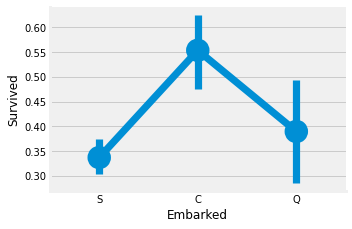

In [119]:
sns.factorplot("Embarked", # eixo x
               "Survived",  # eixo y
               data = data)

fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

O porto **C** teve maiores chances de sobrevivência (cerca de 55% ) enquanto o **menor foi o porto S**

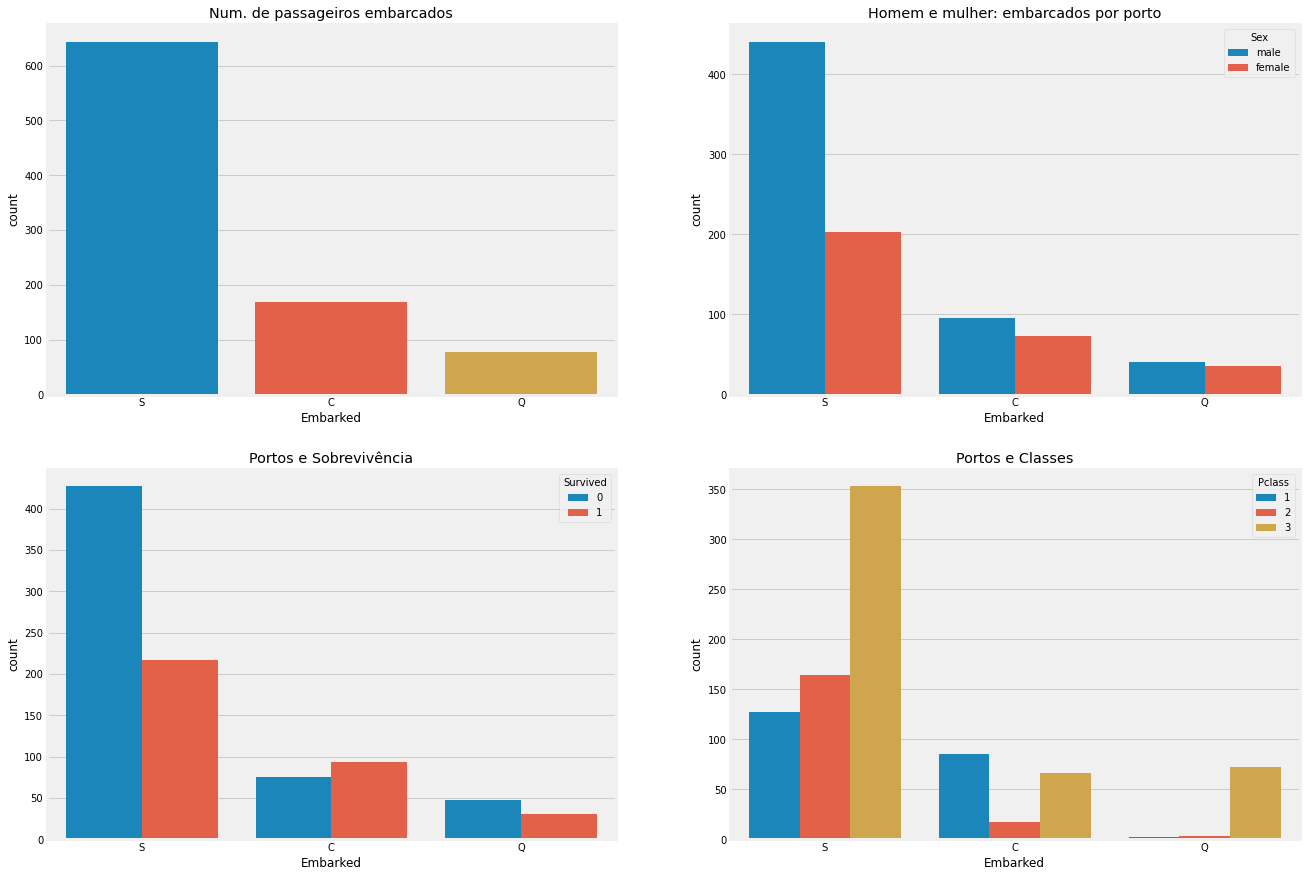

In [120]:
f, ax = plt.subplots(2,2, figsize = (20,15))

#contagem dos diferentes Portos
sns.countplot("Embarked", 
              data = data,
              ax = ax[0,0])
ax[0,0].set_title("Num. de passageiros embarcados")

#contagem de homens e mulheres que embarcaram em diferentes portos.
sns.countplot("Embarked", 
              hue = "Sex",
              data= data,
              ax = ax [0,1])
ax[0,1].set_title("Homem e mulher: embarcados por porto")


#contagem de passageiros que sobreviveram nos diferentes portos.


sns.countplot("Embarked",
              hue = "Survived",
              data = data,
              ax = ax[1,0])
ax[1,0].set_title("Portos e Sobrevivência")

#Contagem do tipo de porto e das classes..

sns.countplot("Embarked",
              hue = "Pclass",
              data = data,
              ax = ax[1,1])

ax[1,1].set_title("Portos e Classes")




plt.show()

**Obsservações:**
1) A maioria dos passageiros de S era da Classe 3.
2) Os passageiros de C tiveram uma boa proporção de sobrevivência. A razão disso pode ser que talvez o resgate das Classes 1 e 2 foram melhores pela condição social
3) O Porto S obteve a maioria de pessoas ricas, mas as chances de sobrevivência ainda são baixas aqui, por conta de muitos passageiros da classe 3 não sobreviverem.
4) O Porto Q tem quase 95% de passageiros da classe 3.

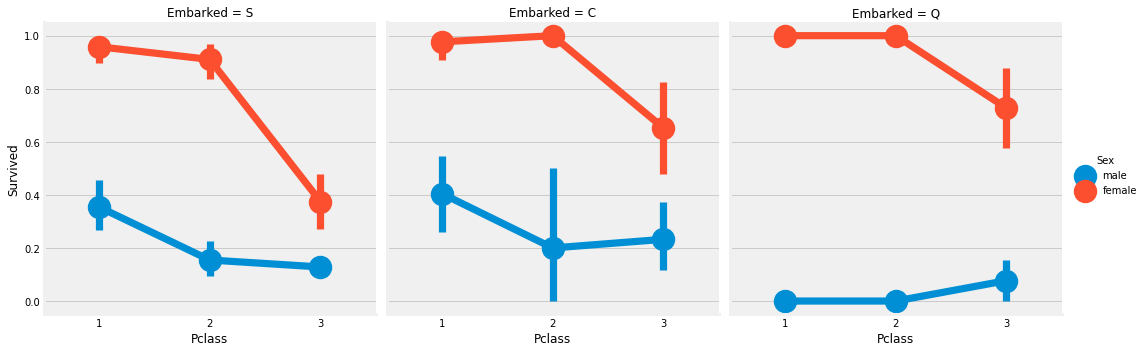

In [121]:
sns.factorplot('Pclass', # eixo X
               'Survived', # eixo Y (porcentagem)
               hue = 'Sex', #diferenciação
               col = 'Embarked', #colunas serão separadas pelos diferentes tipos de Porto
               data = data)
plt.show()

**Observações:**

1) As chances de sobrevivência são quase 1 para mulheres de Classe 1 e 2.
2) O Porto S teve maior taxa de mortaliade para passageiros da classe 3.
3) O porto Q é o pior para os homens, com indice de mortalidade das Classes 1 e 2 bem próximos de 0.



























































































































































































































































































































































































**Preenchendo os valores de Embarked que estão com NaN**

In [122]:
data.Embarked.isnull().sum()

2

Como temos apenas 2 valores nulos, podemos preenchê-los com o porto em que houve maioria de embarcados, que foi o porto S, então temos:

In [123]:
#substituindo os valores NaN por 'S'
data['Embarked'].fillna('S', inplace = True)

#poderiamos fazer assim também: 
#data.loc[(data.Embarked.isnull()), 'Embarked'] = 'S' 

In [124]:
data.Embarked.isnull().any()

False

**SibSp -> Categoria Discreta**

Essa categoria mostra se a pessoa está sozinha ou acompanhada de membros da família.

Sibiling = irmão, irmã, meio irmão, meia irmã..

Spouse = marido, esposa

In [125]:
pd.crosstab(data.SibSp, # linha
            data.Survived).style.background_gradient(cmap = "summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


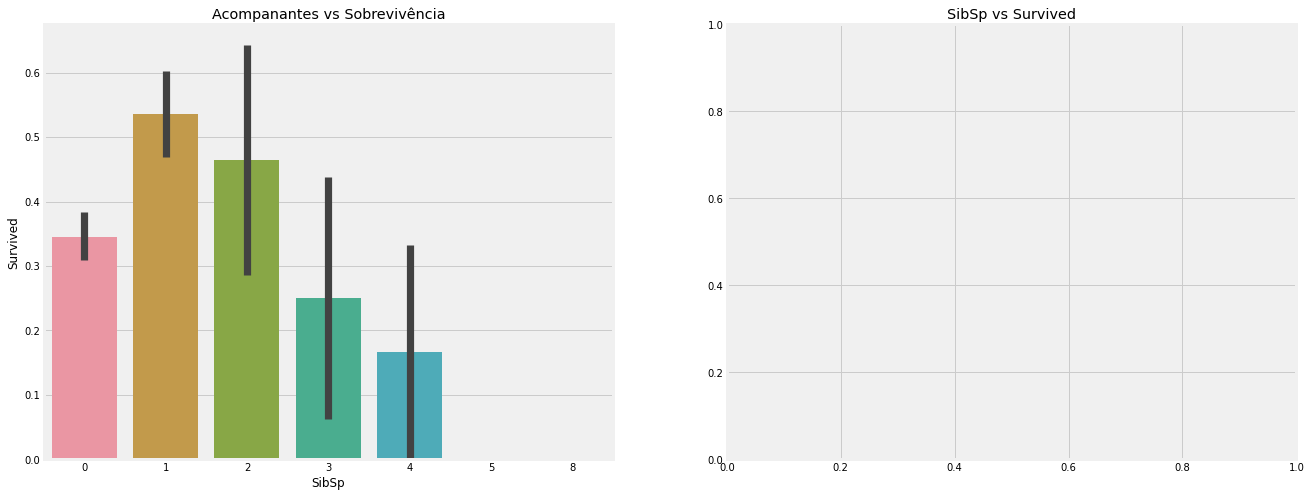

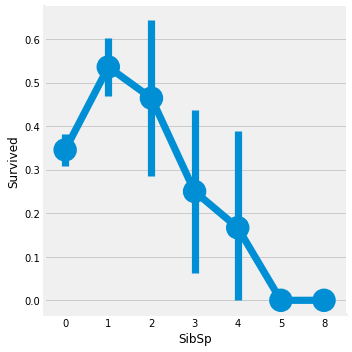

In [126]:
f, ax = plt.subplots(1 ,2, figsize =(20,8))

sns.barplot('SibSp',
            'Survived', 
            data = data, 
            ax = ax[0])
ax[0].set_title("Acompanantes vs Sobrevivência")

sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [127]:
pd.crosstab(data.SibSp,
            data.Pclass).style.background_gradient(cmap = "summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observações:**
O barplot e factorplot mostram se um passageiro sozinho sobrevive mais do que um passageiro acompanhado dos familiares. O que acontece é que conforme os membros da família embarcados aumenta, menor é a taxa de sobreviver. Isso faz sentido, pois uma vez que estamos junto da família tentaremos salvar todos e não apenas 1. 

A razão disso é a Classe, pois podemos ver no Crosstab que temos todos membros com mais de 4 acompanhantes na Classe 3.

**Parch**

In [128]:
pd.crosstab(data.Parch,
            data.Pclass).style.background_gradient(cmap = "summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


O resultado mostra novamente que as famílias maiores estavam na classe 3.

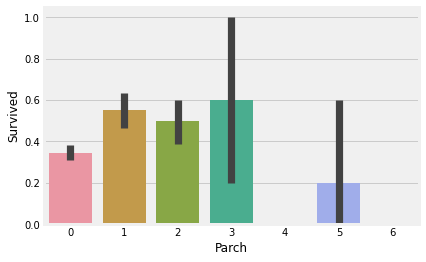

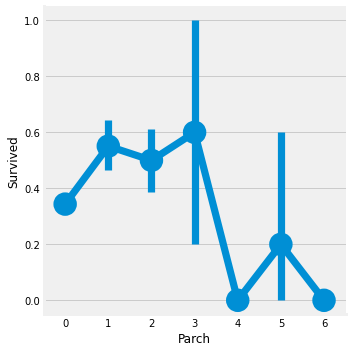

In [129]:
#f, ax = plt.subplots (1,2, figsize = (20,8))

sns.barplot('Parch', 
            'Survived',
            data = data)

sns.factorplot('Parch', 
               'Survived',
               data = data,
               ax = ax[1])

plt.show()

Os resultados são similares. Passageiros com menor número de familiares tem maior chance de sobrevivência, o número de sobreviventes decai enquanto o número de familiares sobe

**Fare-> Variável Contínua**

In [130]:
print((''' 
    A tarifa mais cara foi de:      U${},
    A tarifa mais barata foi de:    U${},
    A média das tarifas foi de:     U${}.
      ''').format(
          data['Fare'].max().round(2),
          data['Fare'].min(),
          data['Fare'].mean().round(2)
      ))

 
    A tarifa mais cara foi de:      U$512.33,
    A tarifa mais barata foi de:    U$0.0,
    A média das tarifas foi de:     U$32.2.
      


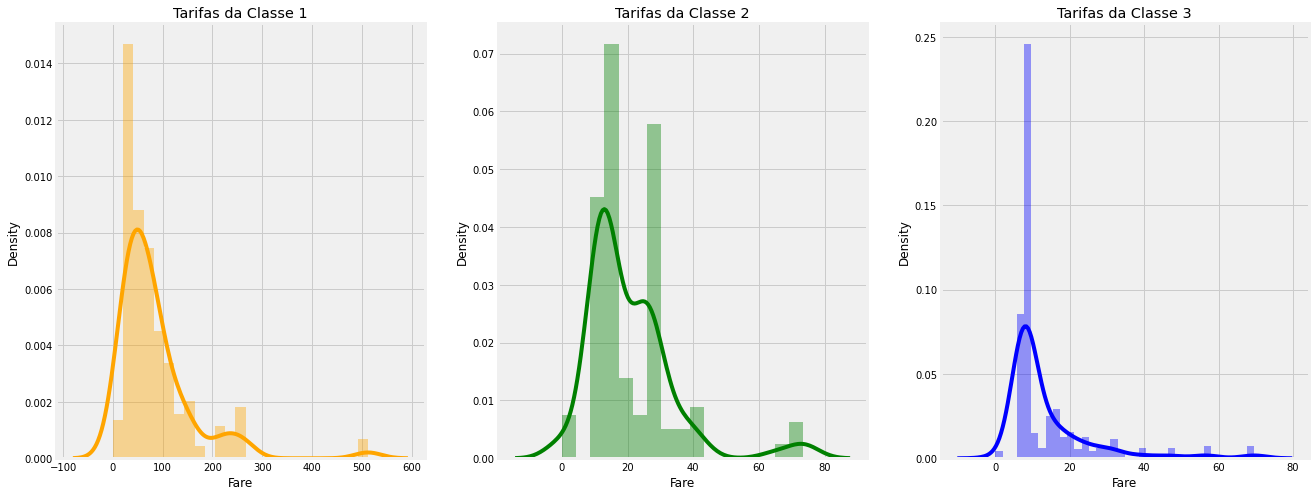

In [131]:
f, ax = plt.subplots(1,3, figsize = (20,8))

#vamos plotar a densidade do valor das tarifas divididos por classes.
sns.distplot( #plotando a densidade.
    data[data['Pclass']==1].Fare, # Filtra o dataset em que Pclass = 1 e mostra as tarifas.
    ax=ax[0], 
    color = 'orange')
ax[0].set_title("Tarifas da Classe 1")



sns.distplot( #plotando a densidade.
    data[data['Pclass']==2].Fare, # Filtra o dataset em que Pclass = 1 e mostra as tarifas.
    ax=ax[1], 
    color = 'green')

ax[1].set_title("Tarifas da Classe 2")
sns.distplot( #plotando a densidade.
    data[data['Pclass']==3].Fare, # Filtra o dataset em que Pclass = 1 e mostra as tarifas.
    ax=ax[2], 
    color = 'blue')

ax[2].set_title("Tarifas da Classe 3")

plt.show()

A distribuição de tarifas é grande na classe 1 ( vai de 0 a 500), enquanto as outras casses têm pouca distribuição.
Como é um valor quase contínuo, podemos transformar em valores discretos usando bin

**Observações Gerais para as Variáveis**


1) **Sexo:** a chance de sobreviver é muito maior para as mulheres.

2) **Pclass:** Existe uma tendência no comportamento de ter sobrevivido se fosse de Classe 1 comparando com outras classes, então, o dinheiro importa nesse caso.

3) **Age (idade):** Crianças entre 5 e 10 anos tem alta chance de sobrevivência, enquanto passageiros de 15 a 35 anos morreram em montes.

4) **Embarked:** Variável interessante. *As chances de sobreviência do **Porto C** parece ser melhor do que a maioria da Classe 1 que embarcou no **Porto S***

5) **Parch + SibSp:** Ter 1 a 2 irmãos, e um marido ou esposa ou 1 a 3 familiares mostra maior chance de sobreviver, ao invés de ter mais familiares.

**Correlação das Variáveis:**

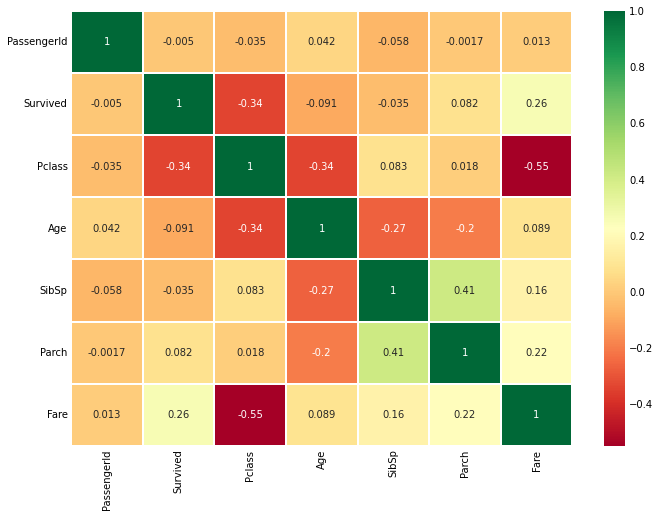

In [132]:
sns.heatmap(
    data.corr(), 
    annot= True,
    cmap = 'RdYlGn', 
    linewidths = 0.2,
    ) #linhas brancas

fig = plt.gcf() #gcf = Get The Current Figure -> Pega a figura acima. -> util para fazer as modificações
fig.set_size_inches(10,8)
plt.show()

**Interpretando o Mapa de Calor:**

1) Não se pode comparar variáveis numéricas com strings.

Antes de entender o gráfico, vamos entender o que a correlação significa.

**CORRELAÇÃO POSITIVA:** Se a variável A crescer, a variável B também cresce. O valor 1 é um valor de correlação perfeito.

**CORRELAÇÃO NEGATIVA:** Se a variável A cresce, a variável B decresce (contrario). Analogamente, o valor -1 é um índice de correlação perfeito.

Assim, quando temos um valor de correlação perfeito, significa que as variáveis são redundantes. Enquanto estivermos fazendo modelos de treino, devemos tentar eliminar as variáveis redundantes com a finalidade de ganhar tempo além de outras vantagens.

Agora, sobre o HeatMap, podemos ver que as variáveis não são muito bem correlacionadas. A maior correlação se encontra entre SibSp e Parch, que é de 0,41. Assim, podemos seguir com todas as variáveis (devemos nos preocupar se tiver um valor acima de 0,5)

<h5>Parte 2 - Engenharia de Variáveis - Limpeza de Dados</h5>

Do jeito que está o dataset, não precisamos utilizar todas as variáveis, algumas são irrelevantes para o modelo preditivo.

Algumas variáveis são redundantes e portanto, devem ser eliminadas do DataFrame. Além disso, podemos a adicionar ou criar novas variáveis observando ou extraindo informações de outras variáveis.

Um exemplo seria pegar as Iniciais de "Name". Vamos ver se conseguimos criar ou excluir algumas variáveis que se encaixem no nosso modelo preditivo. 

**Faixa Etária (Age Band)**

Existe um problema com a variável Idade (Age):

A variável Age é contínua, existe um problema com variáveis continuas em modelos de Machine Learning.

Ex: Posso facilmente segregar um grupo de jogadores de basquete classificando-os como Homem e Mulher

Agora, fazer uma segregação em um grupo por idade é mais complicado, podemos ter 30 pessoas no grupo e cada uma delas ter idades diferentes.

Precisamos então converter os valores contínuos em **Valores Categóricos** , transformando-os em caixas ou normalizando os fatores. 
Nesse caso, vamos fazer em caixas, ou seja, trazer um range de idade para os grupos em um uma caixa ou convertê-lo a um valor fixo.

Assim, o valor máximo de idade dos passageiros era de 80 anos. Então, podemos dividir esse range de 80-0 em 5 "caixas". Assim, temos 80/5 = 16 caixas para colocar as idades dos passageiros.

In [133]:
data['Age_band']= 0 #cria uma coluna vazia.
data.loc[data['Age'] <= 16, 'Age_band'] = 0 # localiza e substitui em Age_band a bin com valor 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [134]:
#Conferindo o número de passageiros em cada faixa etária.
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = "summer_r")

,Age_band
1,382
2,325
0,104
3,69
4,11


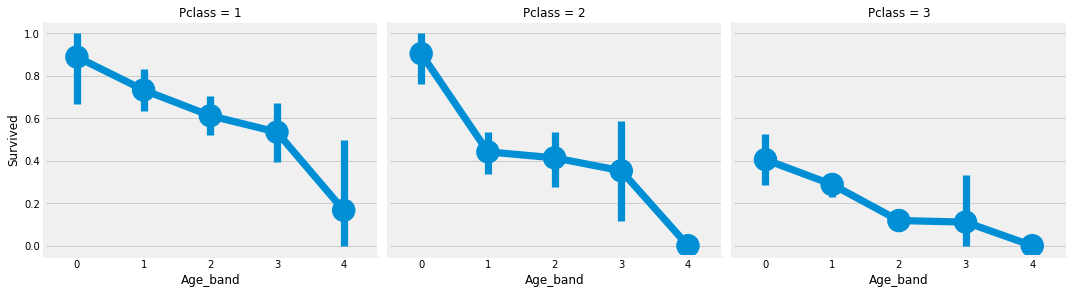

In [135]:
sns.factorplot('Age_band',
               'Survived',
               data = data,
               col = 'Pclass')
fig = plt.gcf() #gcf = Get The Current Figure -> Pega a figura acima. -> util para fazer as modificações
fig.set_size_inches(15,4)
plt.show()


Faz sentido, pois a taxa de sobrevivência cresce comforme a classe e decresce conforme a faixa etária.


**Family Size (Tamanho da Família) / Alone**

*Family Size:*Essa variável é uma "soma" daquela correlação que vimos em SibSP e Parch. Ela nos fornece uma combinação para podermos analisar se as taxas de sobrevivência tem a ver com o tamanho da família dos passageiros. 

*Alone:* Será importante para denotar se uma passageiro está sozinho ou não (True or False)


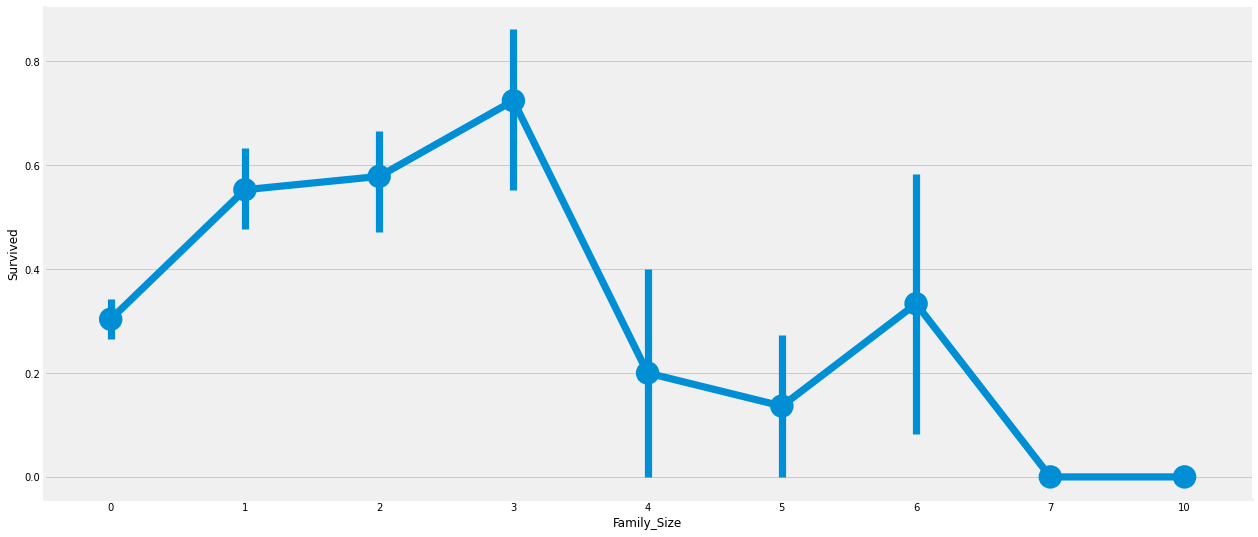

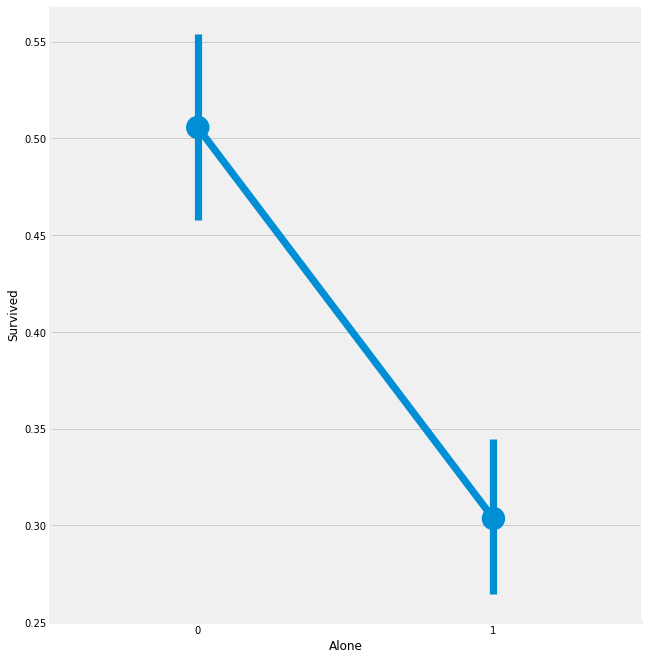

In [136]:
data['Family_Size'] = 0 #criando uma coluna vazia (cheia de zeros para todas as linhas)
data['Family_Size'] = data['Parch'] + data['SibSp'] # concatenando os dados das duas colunas e armazendnaod em uma nova

#criando uma nova coluna para Alone
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 # se o tamanho da familia for zero, está sozinho, então alone = 1


#plotando figura:

#f,ax=plt.subplots(1,2,figsize=(18,6)) # 9x6 para cada um
sns.factorplot('Family_Size',
               'Survived',
               data = data,
               ax = ax[0])

fig = plt.gcf()
fig.set_size_inches(20,8)

sns.factorplot('Alone', 
               'Survived',
               data = data,
               ax = ax[1])

fig = plt.gcf()
fig.set_size_inches(10,10)



#plt.show()

Passageiros com Family Size <= 3 ou Family size > 0 tem grande chance de sobreviver, enquanto passageiros com 0 ou mais de 4 membros da família tem menos de 40% de chance

Passageiros sozinhos tem chance de sobrevivência menor que 40% também

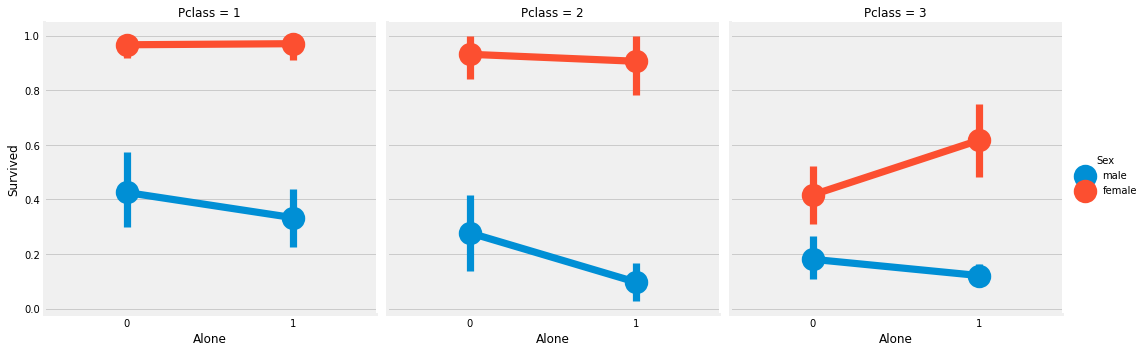

In [137]:
sns.factorplot('Alone',
               'Survived',
               data = data, 
               hue = 'Sex',
               col = 'Pclass')
plt.show()

É visivel que estar sozinho é pior indiferentemente das classes.

A classe 3 é interessante pois podemos ver que nela as mulheres sozinhas tiveram mais chance de sobrevivência do que aquelas que estão com família. (40 a 60%)


**Fare_Range (Ranges das Taxas de Embarcação):**

Como também é uma variável contínua, devemos converter em valor orinal. Para isso, vamos utilizar o **pandas.qcut**

**pandas.qcut** separa e arranja os grupos de valores de acordo com o número de 'caixinhas' que vamos passar como parâmetro. Então, se tivermos 5 bins ( ou caixinhas), o *qcut* vai arranjar uniformemente os espaços de valores em 5 caixas.

In [138]:
data['Fare_Range'] = pd.qcut(data['Fare'] , 4) # colocando 4 caixinhas para ver se é suficiente.

data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'cool')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [139]:
#verificamos que os valores foram bem distribuídos pois temos quantidades bem parecidas em cada grupo.
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare_Range, dtype: int64

Como foi visto anteriormente, podemos perceber que conforme *Fare_Range* cresce, as chances de sobrevivências também crescem (Money Wins!! \o/)

Não podemos passar **Fare_Range** como está, pois devemos converter para valores inteiros, da mesma forma que fizemos em **Age_Band**

In [140]:
#separando os intervalos
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454) , 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31) , 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 512.329) , 'Fare_cat'] = 3


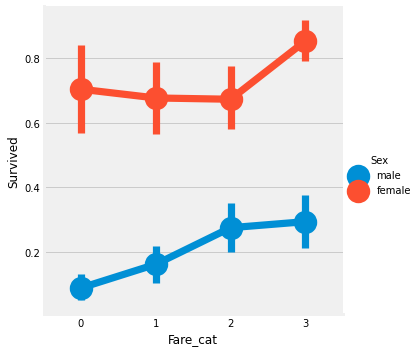

In [141]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = "Sex")
plt.show()

Como vimos anteriormente, quanto maior o "Fare_Range" maior é a condição de sobrevivência acompanhado com o Sexo

**Convertendo variáveis de String categórica par Numérica!**

Vamos converter as variáveis de *Embarked*, *Sex* e *Initial* para valores inteiros.

In [142]:
#fazendo um crosstab maneiro só pra ver os valores das variáveis de string XD
pd.crosstab([data.Sex, data.Embarked], data.Initial).style.background_gradient(cmap = 'hot')

In [143]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)

data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Retirando Variáveis Desnecessárias**

*Name* - Não precisamos do valor de string dessa variável, pois ela não pode ser convertida pra nenhum valor categórico

*Age* - Já temos Age_band

*Ticket* - Essa string só serve para identificar qual foi o ticket comprado, indiferente.

*Fare* - Fare_cat já serve para isso

*Cabin* - Muitos valores nulos. Muitos passageiros também tem multiplas cabines, então esse dado também é irrelevante.

*Fare_Range* - Não precisamos, pois temos Fare_cat

*PassengerId* - É um valor de identificação, ou seja, não pode ser categorizado.

In [151]:
#dropando as colunas desnecessárias:

data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
          axis = 1,
          inplace = True)


KeyError: "['Name' 'Age' 'Ticket' 'Fare' 'Cabin' 'Fare_Range' 'PassengerId'] not found in axis"

In [154]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


Pronto, agora só temos valores contínuos. 

Vamos plotar um heatmap para observar a correlação das variáveis:

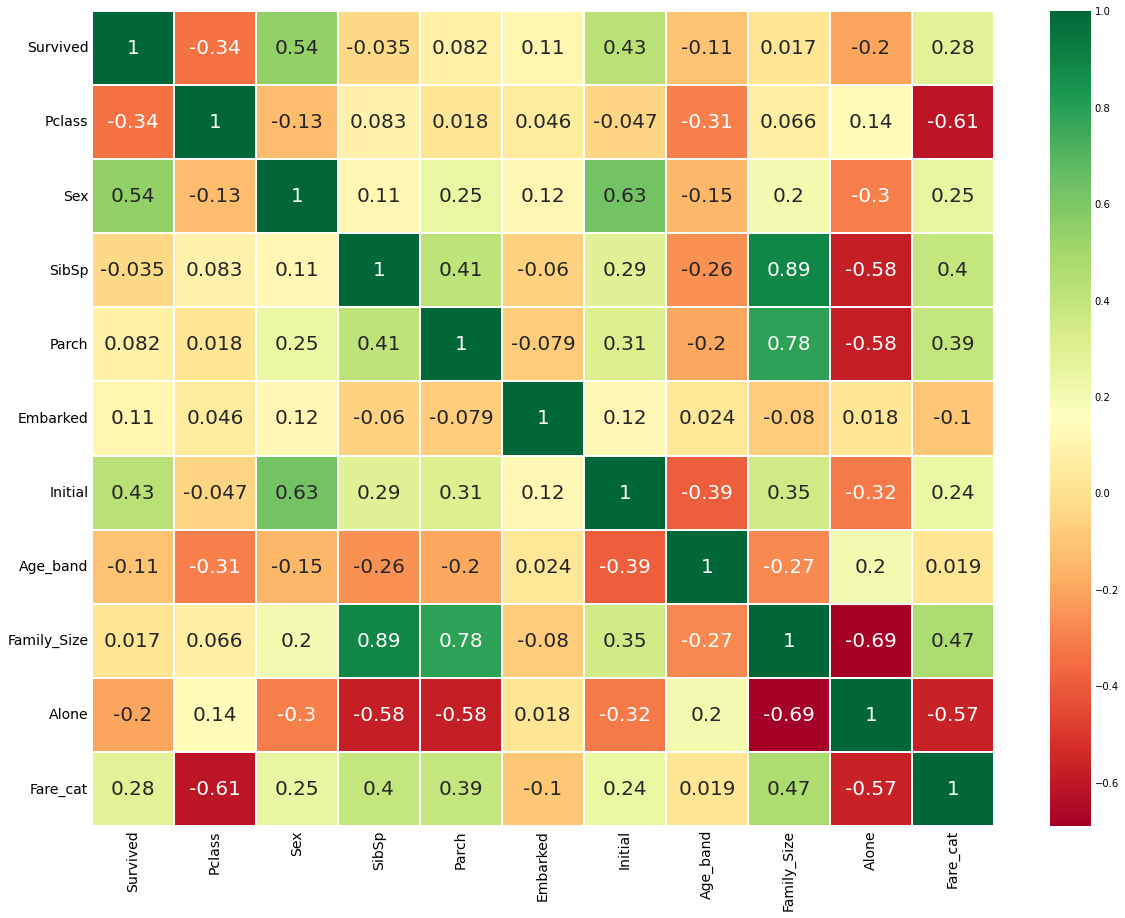

In [161]:
sns.heatmap(data.corr(), #correlação das colunas.
            annot = True, #mostra os valores numéricos em cada quadradinho
            annot_kws = {'size':20}, # tamanho da fonte dos valores numéricos
            cmap = 'RdYlGn', #colormap
            linewidths= 0.2 # tamanho dos recortes brancos dos quadrados
             )

fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Agora, podemos observar alguns valores relevantes de correlação. 

Observe **SibSp** vs **Family_Size** 

Observe também o valor de correlação negativo de **Alone** e **Family_Size**


<h5>Parte 3 - Modelo Preditivo</h5>

Após fazer conseguir alguns insights importantes com a EDA, não podemos prever com eficácia se um passageiro vai sobreviver ou morrer. Para isso, vamos utilizar dos modelos de Classificação para fazer o modelo de decisão.

Para isso vamos utilizar:

1) Regressão Logística
2) Support Vector Machines ( Linear e Radial)
3) KNN( Vizinhos Próximos)
4) Naive Bayes
5) Árvore de Decisão
6) Regressão Logistica novamente


In [145]:
#Importando as bibliotecas necessárias para o ML
#Regressão Logística:
from sklearn.linear_model import LogisticRegression
#Suport Vector Machine:
from sklearn import svm
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier
#treinamento e teste -> data split:
from sklearn.model_selection import train_test_split
# Medidores e outros..
from sklearn import metrics # medir accuracy (eficácia)
from sklearn.metrics import confusion_matrix #matriz de confusão

In [146]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [147]:
train[train.columns[1:]]

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,3,0,0,0,0,0,1,0,1,0
836,3,0,0,0,0,0,1,0,1,1
639,3,0,1,0,0,0,2,1,0,2
389,2,1,0,0,1,2,1,0,1,1
597,3,0,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
131,3,0,0,0,0,0,1,0,1,0
490,3,0,1,0,0,0,2,1,0,2
838,3,0,0,0,0,0,1,0,1,3
48,3,0,2,0,1,0,2,2,0,2


**Radial Support Vector Machines (rbf-SVM):**

In [148]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388
